In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 32 # batch size
version = 3

In [58]:
!pip install -Uqq fastai

In [2]:
from fastai import *
from fastai.vision.all import *
from fastai.vision.widgets import *

In [3]:
data_path = "C:/Users/MD. REZUWAN HASAN/Desktop/Jupyter Notebooks/Master Course BD/Week 9/Own Practice/images"

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [5]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path, bs = bs)
torch.save(dls, f"parrot_dataloader_v{version}.pkl")

In [6]:
dls = torch.load(f"parrot_dataloader_v{version}.pkl")

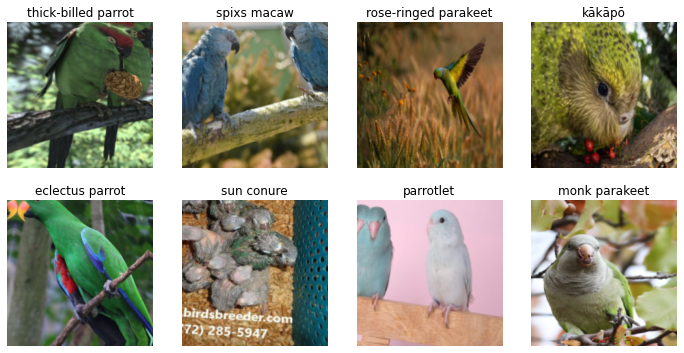

In [7]:
dls.train.show_batch(max_n=8, nrows=2)

C:\Users\MD. REZUWAN HASAN\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


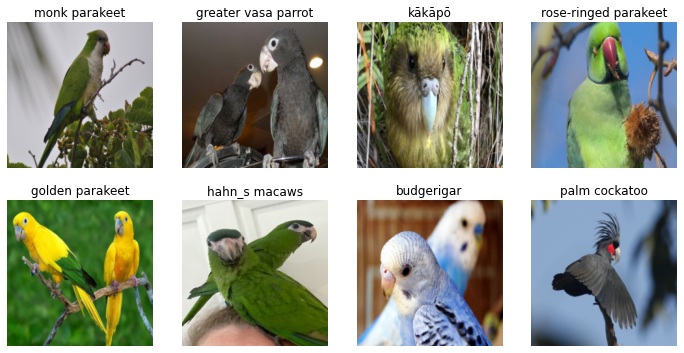

In [8]:
dls.valid.show_batch(max_n=8, nrows=2)

In [9]:
model_path = "models"

In [10]:
model = vision_learner(dls, resnet34, metrics=[error_rate,accuracy])

C:\Users\MD. REZUWAN HASAN\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\MD. REZUWAN HASAN\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [11]:
# model.load(f"parrot-recognizer-v{version}")

In [12]:
model.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.654553,0.890981,0.242340,0.757660,05:52


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.863671,0.566092,0.162953,0.837047,05:52
1,0.774925,0.589056,0.159471,0.840529,05:55
2,0.563748,0.463022,0.112813,0.887187,06:02
3,0.373984,0.399223,0.100279,0.899721,06:48
4,0.302300,0.384754,0.094011,0.905989,06:16


In [13]:
model.save(f"parrot-recognizer-v{version}")

Path('models/parrot-recognizer-v3.pth')

In [14]:
# model.load(f"parrot-recognizer-v{version}")

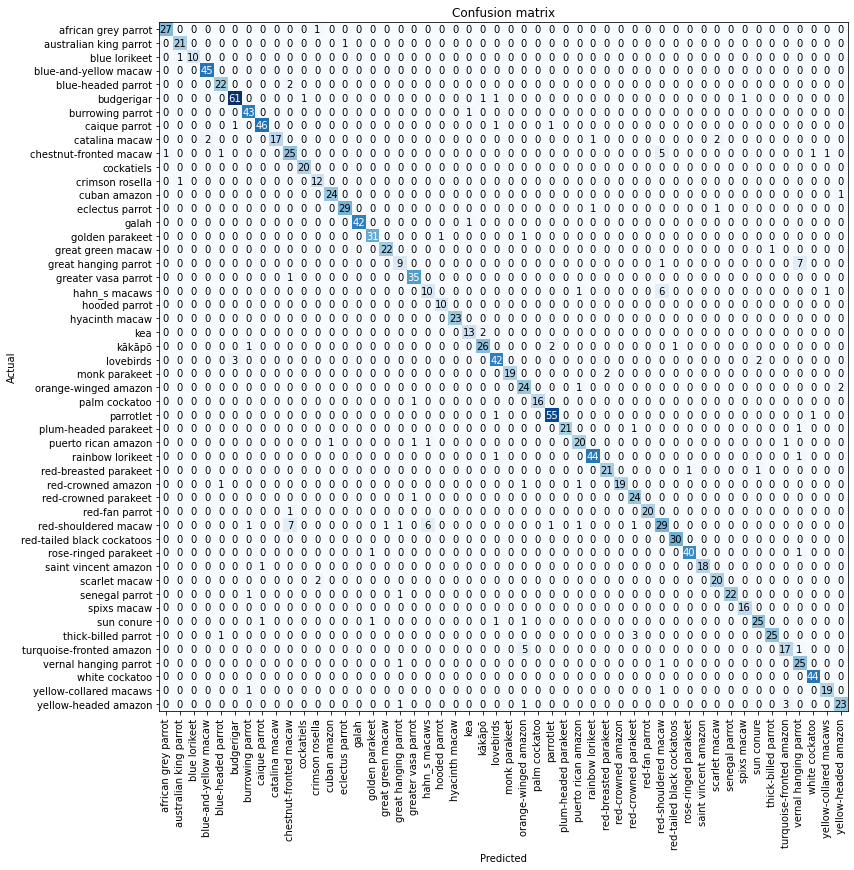

In [15]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(cmap="Blues", figsize = (12, 12))

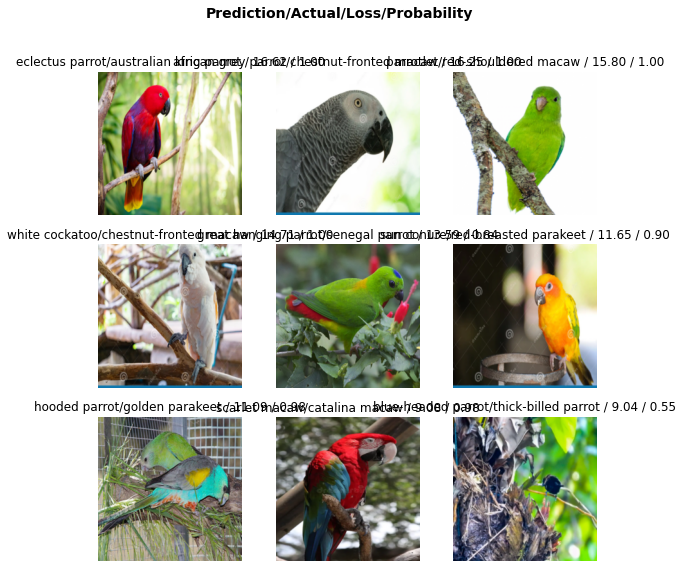

In [16]:
interp.plot_top_losses(9, nrows=3)

In [17]:
cleaner = ImageClassifierCleaner(model)
cleaner # 

In [18]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()                                    # delete irrelevant data
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), f"{data_path}/{cat}") # change the directory

In [19]:
model.export(f"{model_path}/parrot-recognizer-v{version}.pkl")